In [20]:
## CS PMOS Amp Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
param_master = pd.read_csv("cs_amp_pmos_master.csv")

In [22]:
kgm_p = np.abs(param_master['kgmp Y'])
kcsg_p = np.abs(param_master['kcsg_p Y'])
kcgd_p = np.abs(param_master['kcdg_p Y'])
kgds_p = np.abs(param_master['kgds_p Y'])
ids = np.abs(param_master['kgmp X']) 

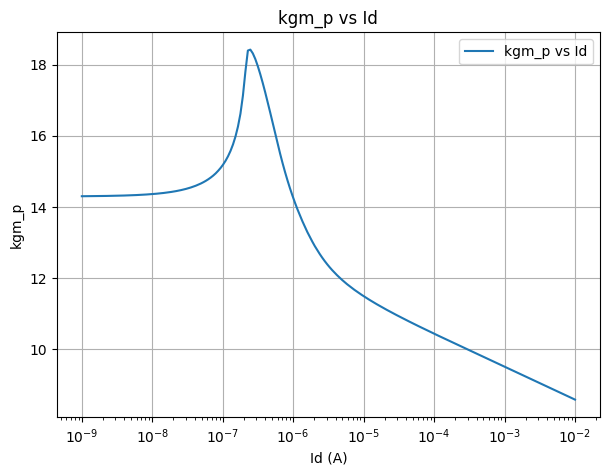

In [23]:
## Kgm vs Id curves for verification
plt.figure(figsize=(7,5))
plt.plot(ids, kgm_p, label='kgm_p vs Id')
plt.xscale('log')
plt.xlabel('Id (A)')
plt.ylabel('kgm_p')
plt.title('kgm_p vs Id')
plt.grid(True)
plt.legend()
plt.show()

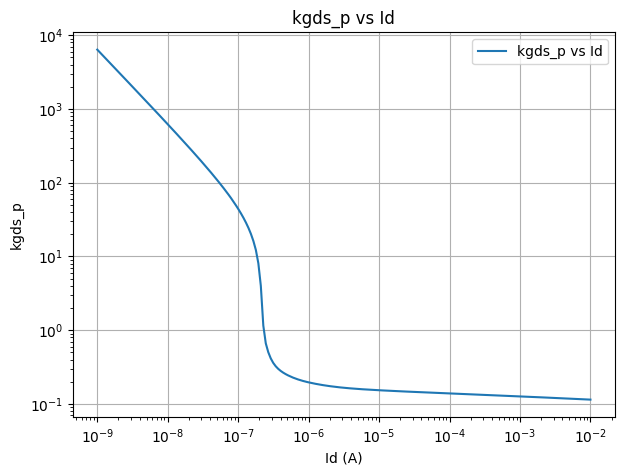

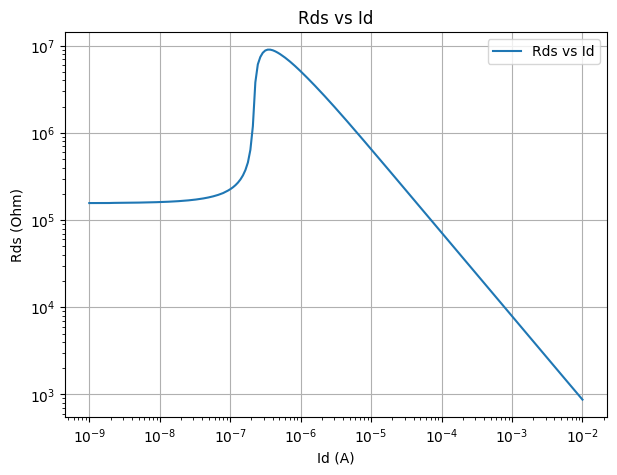

In [24]:
plt.figure(figsize=(7,5))
plt.plot(ids, kgds_p, label='kgds_p vs Id')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Id (A)')
plt.ylabel('kgds_p')
plt.title('kgds_p vs Id')
plt.grid(True)
plt.legend()
plt.show()

Rds = 1/(ids*kgds_p)
plt.figure(figsize=(7,5))
plt.plot(ids, Rds, label='Rds vs Id')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Id (A)')
plt.ylabel('Rds (Ohm)')
plt.title('Rds vs Id')
plt.grid(True)
plt.legend()
plt.show()

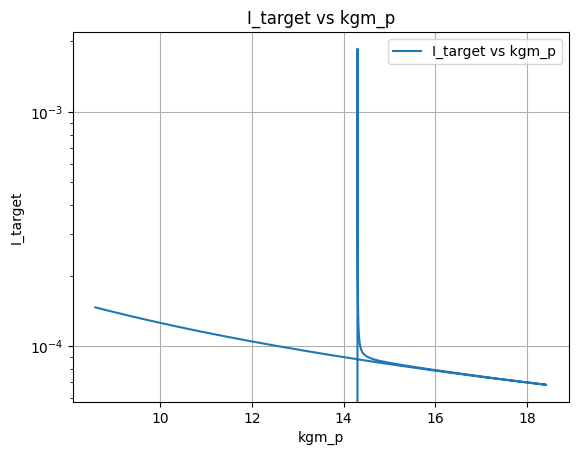

At kgm_p = 18 S, I = 70.12440343632403 uA
At kgm_p = 18 S, M_scale = 223.03951271637888


In [25]:
## Defining specs

Av_target = 10
f_bw = 2e6
GBW_target = Av_target * f_bw
C_L = 10e-12 # Based on PMOS sizing requirements for 10mA max current

I_target = 2*np.pi*GBW_target*C_L/(kgm_p - (2*np.pi*GBW_target*(kcgd_p)))

plt.plot(kgm_p, I_target, label='I_target vs kgm_p')
plt.yscale('log')
plt.xlabel('kgm_p')
plt.ylabel('I_target')
plt.title('I_target vs kgm_p')
plt.grid(True)
plt.legend()
plt.show()

kgm_p_target = 18
I_target_index = (np.abs(kgm_p - kgm_p_target)).idxmin()
I_1 = I_target[I_target_index]
ids_ref = ids[I_target_index]
M_scale = I_1/ids_ref
print(f"At kgm_p = {kgm_p_target} S, I = {I_target[I_target_index]*1e6} uA")
print(f"At kgm_p = {kgm_p_target} S, M_scale = {M_scale}")

In [26]:
kgds_eff = (np.abs(kgds_p))

# R_eff = 1/(ids*kgds_eff)

# plt.figure(figsize=(7,5))
# plt.plot(ids, R_eff, label='R_eff vs Id')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Id (A)')
# plt.ylabel('R_eff (Ohm)')
# plt.title('R_eff vs Id')
# plt.grid(True)
# plt.legend()
# plt.show()

# Find the index where ids is closest to I_1
# idx_closest = (np.abs(ids - I_1)).idxmin()
# R_eff_at_I1 = R_eff[idx_closest]

R_eff_at_I1 = 1/(I_1*kgds_eff[I_target_index])
print(f"R_eff at I_1 = {I_1:.6e} A is {R_eff_at_I1:.2e} Ohm")

gds_at_I1 = 1/R_eff_at_I1
print(f"gds at I_1 = {I_1*1e6:.2f} uA is {gds_at_I1*1e3:.3f} mS")

gmp_target = kgm_p_target * I_1
Av_target_check = gmp_target * R_eff_at_I1
print(f"At I_1 = {I_1*1e6:.2f} uA, gmp = {gmp_target*1e3:.2f} mS, Av = {Av_target_check:.2f}")



R_eff at I_1 = 7.012440e-05 A is 3.96e+04 Ohm
gds at I_1 = 70.12 uA is 0.025 mS
At I_1 = 70.12 uA, gmp = 1.26 mS, Av = 49.93


In [27]:
## Estimating input capacitance for the amplifier stage

cgs_p = kcsg_p * I_target
cgd_p = kcgd_p * I_target

C_in = cgs_p + cgd_p * (1 + Av_target_check)

print(f"At I_target = {I_target[I_target_index]*1e6:.2f} uA, cgs_p = {cgs_p[I_target_index]*1e15:.2f} fF, cgd_p = {cgd_p[I_target_index]*1e15:.2f} fF")
print(f"At I_target = {I_target[I_target_index]*1e6:.2f} uA, C_in = {C_in[I_target_index]*1e12:.2f} pF")

At I_target = 70.12 uA, cgs_p = 36.92 fF, cgd_p = 20.22 fF
At I_target = 70.12 uA, C_in = 1.07 pF


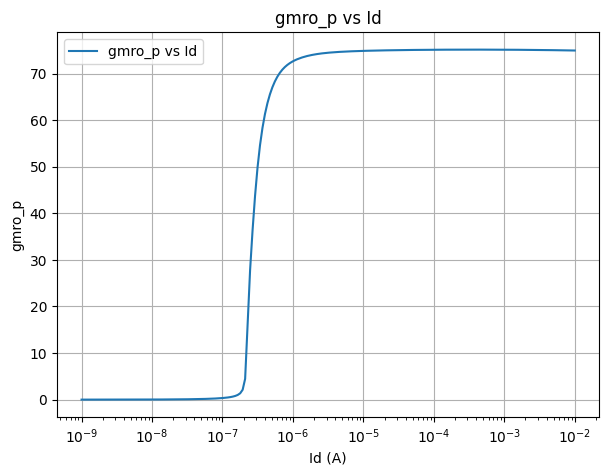

In [31]:
## gmro plot for PMOS
gmro_p = (kgm_p * ids) / (ids * kgds_p)
plt.figure(figsize=(7,5))
plt.plot(ids, gmro_p, label='gmro_p vs Id')
plt.xscale('log')
plt.xlabel('Id (A)')
plt.ylabel('gmro_p')
plt.title('gmro_p vs Id')
plt.grid(True)
plt.legend()